# Load, Preview & Warm up

In [853]:
import pandas as pd

df = pd.read_csv("trends1.csv", sep=",")
#Rearrange the columns date first 
df = df[['date','top 1','top 2','top 3']]
df["date"] = pd.to_datetime(df["date"])
df.tail()

,date,top 1,top 2,top 3
256,2017-09-03,18,72,35
257,2017-09-10,17,67,37
258,2017-09-17,18,66,32
259,2017-09-24,19,62,31
260,2017-10-01,20,78,27


In [854]:
df["top 1"].head().values

array([4, 7, 5, 5, 4], dtype=int64)

In [855]:
df_plot2 = pd.DataFrame({
   'T1': df["top 1"].values,
   'T2': df["top 2"].values,
   'T3': df["top 3"].values
   }, index=pd.to_datetime(df["date"])
                    )
print("Preview")
print(df_plot.tail())

Preview
                   T1         T2         T3
date                                       
2018-09-27  17.533665  64.549945  36.037766
2018-09-28  17.594394  64.319097  36.139121
2018-09-29  17.656862  64.104769  36.265359
2018-09-30  17.720324  63.903832  36.412168
2018-10-01  17.783823  63.712625  36.574825


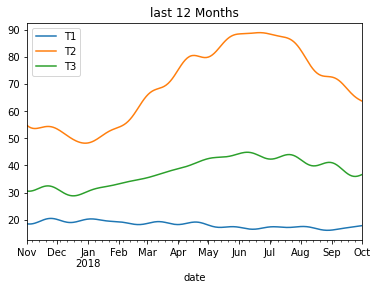

In [856]:
#LAST 12 MONTH Data 
last12M = df_plot.last('12M')

lines = last12M.plot.line(title="last 12 Months")

In [857]:
last12M.describe()

,T1,T2,T3
count,335.000000,335.000000,335.000000
mean,18.178139,69.773426,37.635520
std,1.193198,14.015715,4.998651
min,16.074955,48.169006,28.771228
25%,17.198043,54.212890,32.504033
50%,18.252438,71.331680,38.382653
75%,19.118932,82.307549,42.444886
max,20.459308,88.884805,44.827019


<AxesSubplot:title={'center':'2017 Performance'}, xlabel='date'>

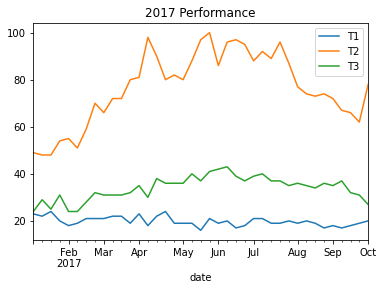

In [858]:
#GET YEAR 2017 PERFORMANCE 
y2017 = df_plot2[(df_plot2.index > '2017-01-01')]
y2017.plot.line(title='2017 Performance')

<AxesSubplot:title={'center':'2016 Performance'}, xlabel='date'>

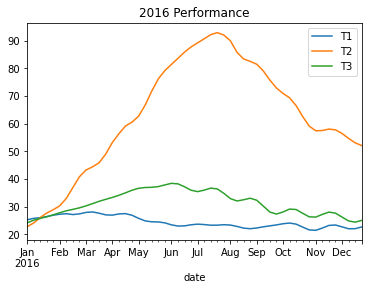

In [859]:
#GET YEAR 2016 PERFORMANCE 
y2016 = df_plot[(df_plot.index > '2016-01-01') & (df_plot.index < '2016-12-31')]
y2016.head()
y2016.plot.line(title='2016 Performance')

# Part 1

Assess the three trends in trends1.csv. State which is performing best and elaborate how you have defined "best performance".

Create a Python class that has the following methods:
#### 1.  last_12m: calculates the performance of the input ‘top’ for the last 12 months.





In [860]:
def last_12m(df,top): 
    
    df = pd.DataFrame(dict(average=df[top].values), df['date'].values)
    Average12M = df.groupby(pd.Grouper(freq='12M')).mean()
    
    print(Average12M)
    #1st 12
    a = Average12M.iloc[-1].values[0]
    print("1st Last 12 Months",a)
    #2nd 12
    b = Average12M.iloc[-2].values[0]
    print("2nd Last 12 Months",b)

    perf =(a-b)
    print(a,"-",b,"/",b)
    perf = round(perf , 2)
    
    return perf

In [861]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("trends1.csv", sep=",")
#Rearrange the columns date first 
df = df[['date','top 1','top 2','top 3']]
df["date"] = pd.to_datetime(df["date"])

last_12m(df,'top 2')


              average
2012-10-31  14.000000
2013-10-31  16.000000
2014-10-31  18.442308
2015-10-31  22.269231
2016-10-31  56.056604
2017-10-31  72.520833
1st Last 12 Months 72.52083333333333
2nd Last 12 Months 56.056603773584904
72.52083333333333 - 56.056603773584904 / 56.056603773584904


16.46


#### 2.  perf_12m: Outputs a dictionary in the format given by the eg:
##### {top1: Top 1’s performance for the last 12 months is -3.25%}


In [862]:
def perf_12m(df): 
    dic1 = {}
    for i in x.columns:
        Column = i
        x[Column].describe().mean()
        top = last_12m(df,Column)
        print("-----------------------------------------------------")
        dic1.update({Column : Column+"’s performance for the last 12 months is "+str(top)+"%"})
    return dic1

In [863]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("trends1.csv", sep=",")
#Rearrange the columns date first 
df = df[['date','top 1','top 2','top 3']]
df["date"] = pd.to_datetime(df["date"])

dic = perf_12m(df)
dic

              average
2012-10-31   5.250000
2013-10-31   4.384615
2014-10-31   4.384615
2015-10-31   7.903846
2016-10-31  23.018868
2017-10-31  20.229167
1st Last 12 Months 20.229166666666668
2nd Last 12 Months 23.0188679245283
20.229166666666668 - 23.0188679245283 / 23.0188679245283
-----------------------------------------------------
              average
2012-10-31  14.000000
2013-10-31  16.000000
2014-10-31  18.442308
2015-10-31  22.269231
2016-10-31  56.056604
2017-10-31  72.520833
1st Last 12 Months 72.52083333333333
2nd Last 12 Months 56.056603773584904
72.52083333333333 - 56.056603773584904 / 56.056603773584904
-----------------------------------------------------
              average
2012-10-31  14.750000
2013-10-31  14.442308
2014-10-31  18.846154
2015-10-31  23.192308
2016-10-31  29.830189
2017-10-31  32.166667
1st Last 12 Months 32.166666666666664
2nd Last 12 Months 29.830188679245282
32.166666666666664 - 29.830188679245282 / 29.830188679245282
---------------------------

{'top 1': 'top 1’s performance for the last 12 months is -2.79%',
 'top 2': 'top 2’s performance for the last 12 months is 16.46%',
 'top 3': 'top 3’s performance for the last 12 months is 2.34%'}

#### Best is top 2 has improved sales up 16% Average monthly sales from last 12 months compared to previous last 12 months 

# Part 2

Look at the predictions.csv file - there are three fits for each trend, comment on which you find to be best.
Quantify these predictions into an assessment of how you would expect the demand to change over the next 3, 6, 12 months.
####  Please create your own prediction model based on the three types of tops.
##### Briefly explain your choice of model, and how it performs better or worse than the provided predictions.

##### Comparison of predicted and Actual for Fit1

Preview
                   T1         T2         T3
date                                       
2018-09-27  16.588328  98.782168  36.344867
2018-09-28  16.655365  98.884051  36.503322
2018-09-29  16.724295  99.019655  36.689969
2018-09-30  16.794364  99.184409  36.900044
2018-10-01  16.864604  99.372937  37.128318


<AxesSubplot:title={'center':'Actual 2017 Performance'}, xlabel='date'>

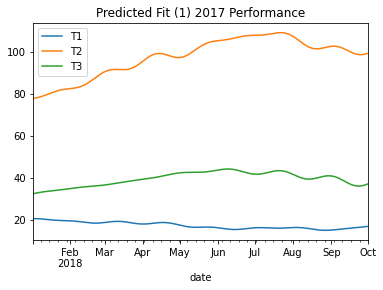

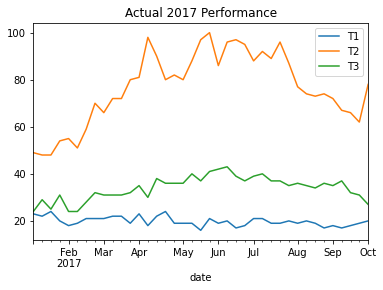

In [864]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("predictions.csv", sep=",")
#Rearrange the columns date first 
df = df[['date','fit top 1','fit top 2','fit top 3']]
df["date"] = pd.to_datetime(df["date"])

df_plot = pd.DataFrame({
   'T1': df["fit top 1"].values,
   'T2': df["fit top 2"].values,
   'T3': df["fit top 3"].values
   }, index=pd.to_datetime(df["date"])
                    )
print("Preview")
print(df_plot.tail())

y2017 = df_plot[(df_plot.index > '2018-01-01')]
y2017.plot.line(title='Predicted Fit (1) 2017 Performance')

y2017 = df_plot2[(df_plot2.index > '2017-01-01')]
y2017.plot.line(title='Actual 2017 Performance')

##### Comparison of predicted and Actual for Fit2

Preview
                   T1         T2         T3
date                                       
2018-09-27  17.507205  73.258258  36.316258
2018-09-28  17.567572  73.103604  36.415425
2018-09-29  17.629760  72.967858  36.538825
2018-09-30  17.693017  72.847916  36.682254
2018-10-01  17.756372  72.740112  36.841104


<AxesSubplot:title={'center':'Actual 2017 Performance'}, xlabel='date'>

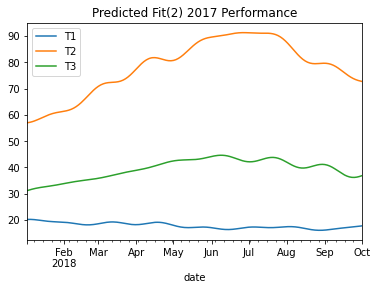

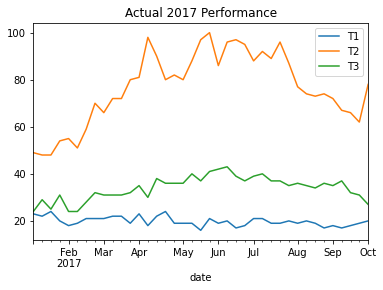

In [865]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("predictions.csv", sep=",")
#Rearrange the columns date first 
df = df[['date','fit2 top 1','fit2 top 2','fit2 top 3']]
df["date"] = pd.to_datetime(df["date"])

df_plot = pd.DataFrame({
   'T1': df["fit2 top 1"].values,
   'T2': df["fit2 top 2"].values,
   'T3': df["fit2 top 3"].values
   }, index=pd.to_datetime(df["date"])
                    )
print("Preview")
print(df_plot.tail())

y2017 = df_plot[(df_plot.index > '2018-01-01')]
y2017.plot.line(title='Predicted Fit(2) 2017 Performance')

original = df_plot2[(df_plot2.index > '2017-01-01')]
original.plot.line(title='Actual 2017 Performance')

##### Comparison of predicted and Actual for Fit3

Preview
                   T1         T2         T3
date                                       
2018-09-27  17.533665  64.549945  36.037766
2018-09-28  17.594394  64.319097  36.139121
2018-09-29  17.656862  64.104769  36.265359
2018-09-30  17.720324  63.903832  36.412168
2018-10-01  17.783823  63.712625  36.574825


<AxesSubplot:title={'center':'Actual 2017 Performance'}, xlabel='date'>

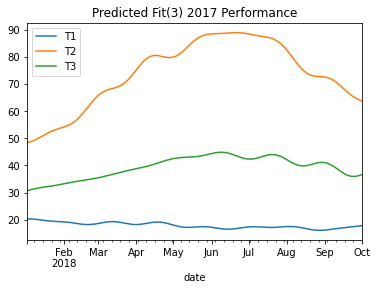

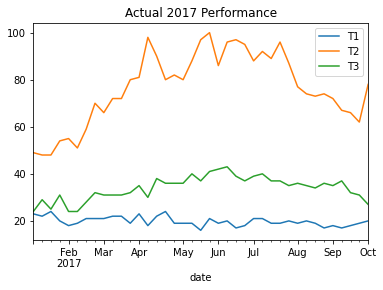

In [866]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("predictions.csv", sep=",")
#Rearrange the columns date first 
df = df[['date','fit3 top 1','fit3 top 2','fit3 top 3']]
df["date"] = pd.to_datetime(df["date"])

df_plot = pd.DataFrame({
   'T1': df["fit3 top 1"].values,
   'T2': df["fit3 top 2"].values,
   'T3': df["fit3 top 3"].values
   }, index=pd.to_datetime(df["date"])
                    )
print("Preview")
print(df_plot.tail())

y2017 = df_plot[(df_plot.index > '2018-01-01')]
y2017.plot.line(title='Predicted Fit(3) 2017 Performance')

y2017 = df_plot2[(df_plot2.index > '2017-01-01')]
y2017.plot.line(title='Actual 2017 Performance')

##### Comparison of shows fit 1 is best predicted compared to the others as it closely resembles the actual performance for last 12 months 

##### Quantify these predictions into an assessment of how you would expect the demand to change over the next 3, 6, 12 months.
###### The tops have different trends and are seasonally trends that is between April and August are higher compared to other months 

##### Please create your own prediction model based on the three types of tops.

Preview
                   T1         T2         T3
date                                       
2018-09-27  17.533665  64.549945  36.037766
2018-09-28  17.594394  64.319097  36.139121
2018-09-29  17.656862  64.104769  36.265359
2018-09-30  17.720324  63.903832  36.412168
2018-10-01  17.783823  63.712625  36.574825


<AxesSubplot:title={'center':'Actual Performance'}, xlabel='date'>

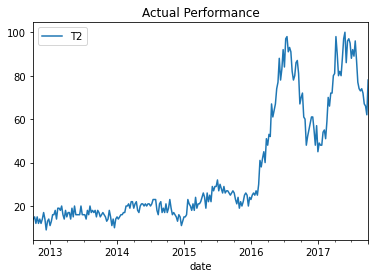

In [867]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("trends1.csv", sep=",")
#Rearrange the columns date first 
df = df[['date','top 2']]
df_plot2 = pd.DataFrame({
   'T2': df["top 2"].values,
   }, index=pd.to_datetime(df["date"])
                    )
print("Preview")
print(df_plot.tail())
y = df_plot2
temp = y[(y.index > '2010-01-01')]
temp.plot.line(title='Actual Performance')



In [ ]:
train = y[(y.index < pd.to_datetime("2016-11-01", format='%Y-%m-%d')) & (y.index >= pd.to_datetime("2015-11-01", format='%Y-%m-%d'))]
test = y[y.index >= pd.to_datetime("2016-11-01", format='%Y-%m-%d')]

plt.plot(train, color = "black")
plt.plot(test, color = "red")
plt.ylabel('Sales')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test/Prediction")

SARIMAXmodel = SARIMAX(y, ar=6, order = (5, 4, 2), seasonal_order=(2,2,2,12))
SARIMAXmodel = SARIMAXmodel.fit()

y_pred = SARIMAXmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = SARIMAXmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"] 
plt.plot(y_pred_out, color='Blue', label = 'SARIMA Predictions')
plt.legend()



plt.show()

C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'
C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'
